# Анализ заведений общественного питания в Москве.

 # Описание проекта:

Я — гуру аналитики, и партнёры просят меня подготовить исследование рынка. У меня есть открытые данные о заведениях общественного питания в Москве.

   # Цель исследования:

    Проанализировать рынок общественного питания в Москве
    Выяснить, имеет ли смысл открывать общепит с роботами
    
# Ход исследования:

Данные о поведении пользователей мы получим из предоставленных файлов. О качестве данных ничего не известно, поэтому перед проверкой гипотез понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных. Далее нужно будет обработать и добавить необходимые значения в таблицу и проанализировать.

# Анализ данных
    Исследем соотношение видов объектов общественного питания по количеству. Построим график.
    Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.
    Для какого вида объекта общественного питания характерно сетевое распространение?
    Характеристика мест сетевых заведений
    Для каждого вида объекта общ. питания описать среднее количество посадочных мест. Построим графики.
    Выделить в отдельный столбец информацию об улице из столбца `address` 
    Построить график топ-10 улиц по количеству объектов общественного питания
    Найти число улиц с одним объектом общественного питания.
    Сделать общий вывод и дать рекомендации о виде заведения
    Подготовка презентации

    
# Описание данных

Таблица rest_data:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.

## Загрузка и изучение данных

In [39]:
# импортируем библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import plotly.express as px
from plotly import graph_objects as go
import plotly.express as px
sns.set(rc={'figure.figsize':(13, 8)})

In [40]:
# откроем файлы
rest_data = pd.read_csv('rest_data.csv')

# смотрим общую информацию
rest_data.info()
rest_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Таблица `rest_data`:
* 6 столбцов
* 15366 строк
* 2 типа данных: int64 и object.

## Предобработка данных

In [41]:
# проверим на наличие пропусков
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Пропуски отсутствуют

In [42]:
# проверим на дубликаты
rest_data.duplicated(subset=['object_name',  'chain', 'object_type', 'address','number']).sum()

82

дубликатов - 82, небольшое значение, можно удалить

In [43]:
# удаляем дубликаты
rest_data = rest_data.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type', 'number'])
# проверяем
display(rest_data.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number']).sum())
rest_data.info()

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15284 non-null  int64 
 1   object_name  15284 non-null  object
 2   chain        15284 non-null  object
 3   object_type  15284 non-null  object
 4   address      15284 non-null  object
 5   number       15284 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.8+ KB


дубликатов - 0

было 15366 строк, стало 15284

### Стиль столбцов
Проверим уникальные значения в  стобцах - приведём к нижнему регистру

In [44]:
rest_data['object_type'] = rest_data['object_type'].str.lower()
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [45]:
# сократим предприятие быстрого обслуживания в быстрое питание
rest_data['object_type'] = rest_data['object_type'].str.replace('предприятие быстрого обслуживания','быстрое питание')
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная', 'быстрое питание', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'магазин (отдел кулинарии)'],
      dtype=object)

In [46]:
# имена заведений
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['object_name'].unique()

array(['сметана', 'родник', 'кафе «академия»', ..., 'бар мята lounge',
       'мята lounge октябрьская', 'кальянная «мята lounge»'], dtype=object)

### Предварительный вывод:

Провели предобработку и подготовили данные исследованию.
* Пропуски отсутствуют
* Проверили таблицы на наличие дубликатов и удалили их
* Проверили типы данных
* Исправили данные столбцов

## Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству

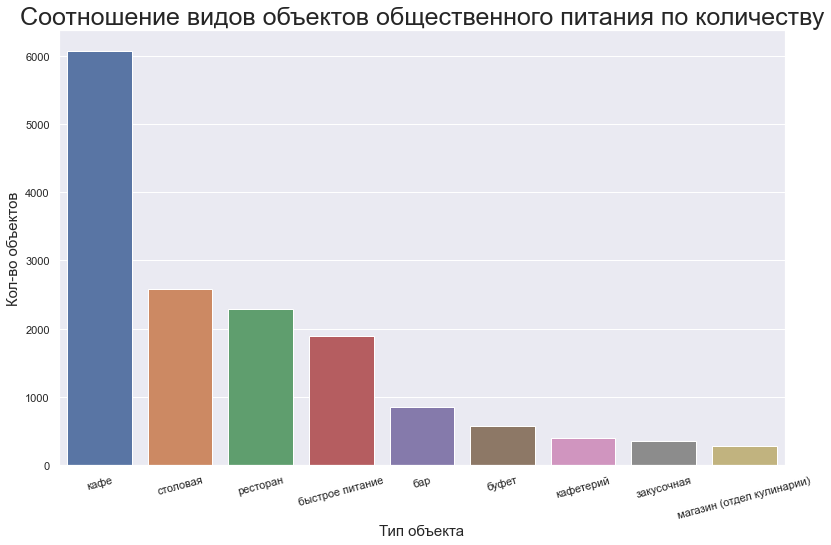

In [47]:
# построим график
types_of_food = rest_data.groupby('object_type').count().reset_index()
ax = sns.barplot(x='object_type', y='object_name', data=types_of_food
                 .sort_values(by='number', ascending=False) 
                 )
plt.xticks(rotation=15)
plt.ylabel('Кол-во объектов', size=15)
plt.xlabel('Тип объекта', size=15)
plt.title('Соотношение видов объектов общественного питания по количеству', size=25)
plt.show()

In [48]:
# посмотрим данные
types_of_food

,object_type,id,object_name,chain,address,number
0,бар,855,855,855,855,855
1,буфет,577,577,577,577,577
2,быстрое питание,1898,1898,1898,1898,1898
3,закусочная,349,349,349,349,349
4,кафе,6071,6071,6071,6071,6071
5,кафетерий,395,395,395,395,395
6,магазин (отдел кулинарии),273,273,273,273,273
7,ресторан,2282,2282,2282,2282,2282
8,столовая,2584,2584,2584,2584,2584


In [49]:
# отсортируем по типу и кол-ву
types_of_food[['object_type', 'id']].sort_values(by='id').sort_values(by='id', ascending=False).rename(
    columns={'id':'кол-во','object_type':'Тип заведения'}) 

,Тип заведения,кол-во
4,кафе,6071
8,столовая,2584
7,ресторан,2282
2,быстрое питание,1898
0,бар,855
1,буфет,577
5,кафетерий,395
3,закусочная,349
6,магазин (отдел кулинарии),273


### Предварительный вывод:
* Лидер по заведениям общ. питания с большим отрывом - `кафе` (6071)
* Второе место делят - `столовая` и `ресторан`(со средним значением  2400)
* Третье место у предприятий `быстрого питание` (1898),  отношение остальных заведений менее 5%

### Исследуем соотношение сетевых и несетевых заведений по количеству.

In [50]:
# построим сводную таблицу
object_chain = rest_data.groupby('chain')['id'].count()
object_chain

chain
да      2964
нет    12320
Name: id, dtype: int64

In [51]:
name_chain = [
    'сетевые',
    'частные'
]
values = object_chain
fig = go.Figure(data=[go.Pie(labels=name_chain, values=values, textinfo='label+percent')])
fig.update_layout(title_text='Cоотношение сетевых и несетевых заведений по количеству')
fig.show() 

### Предварительный вывод:
По круговой диаграмме видно, что сетевые это только 20% заведений

## Для какого вида объекта общественного питания характерно сетевое распространение

,Тип объекта,Сетевые,Кол-во,% сетевых
4,кафе,1396,6071,22.99
2,быстрое питание,788,1898,41.52
7,ресторан,543,2282,23.79
6,магазин (отдел кулинарии),78,273,28.57
3,закусочная,56,349,16.05
5,кафетерий,52,395,13.16
0,бар,37,855,4.33
1,буфет,11,577,1.91
8,столовая,3,2584,0.12


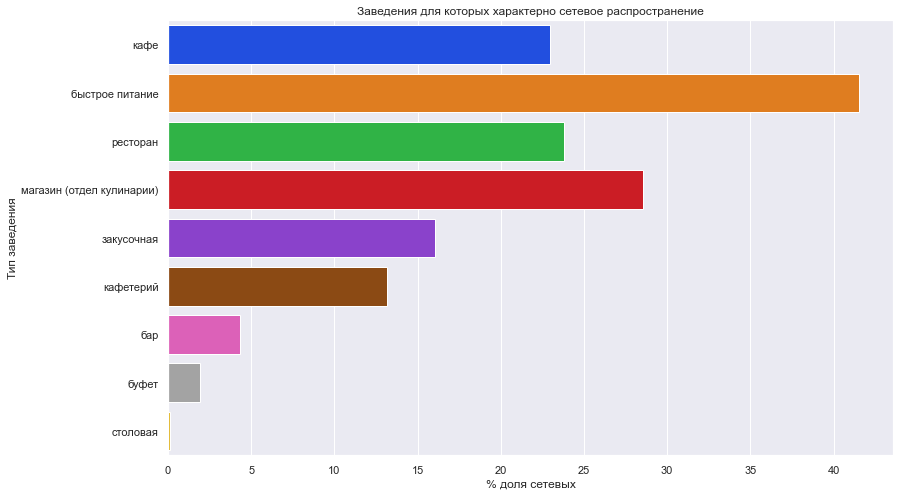

In [52]:
# построим таблицу
chain_object_types = (rest_data.query('chain == "да"')
      .groupby('object_type').agg({'id':'count'})
      .reset_index()
      .sort_values(by='id', ascending=False)
     )
chain_object_types['all_objects'] = types_of_food['id']

chain_object_types.columns=['object_type' , 'chain_objects', 'all_objects']
# посчитаем процент сетевых по типу заведения
chain_object_types['percent_of_tape'] = (chain_object_types['chain_objects'] / 
                                         chain_object_types['all_objects']*100).round(2)
chain_object_types = chain_object_types.rename(columns={'all_objects': 'Кол-во', 'object_type': 'Тип объекта', 
                                                       'chain_objects': 'Сетевые', 'percent_of_tape': '% сетевых'})
display(chain_object_types)


# построим график 
ax = sns.barplot(y = 'Тип объекта', x='% сетевых', data=chain_object_types, palette="bright")
ax.set_xlabel('% доля сетевых')
ax.set_ylabel('Тип заведения')
ax.set_title('Заведения для которых характерно сетевое распространение')

plt.show()

### Предварительный вывод:
Заведения для которых характерно сетевое распространение:
* 1 место  `быстрое питание` (41,52%), которые очень распространены в Москве.  
* На 2 месте `магазин (отдел кулинарии)	` (28,57%)
* На 3 месте `рестораны` (23,79%)

## Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [53]:
chain_object = rest_data.query('chain == "да"')
chain_object

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,да,быстрое питание,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [54]:
# посчитаем кол-во заведений и среднее число посадочных мест
food_chain = (chain_object.groupby('object_type')
               .agg({'id':'count', 'number':'mean'})
               .reset_index()
               .rename(columns={'object_type':'тип заведения','id':'кол-во', 'number':'среднее число мест'})
               .sort_values(by='кол-во', ascending=False)   
               )
              
food_chain

,тип заведения,кол-во,среднее число мест
4,кафе,1396,47.426934
2,быстрое питание,788,40.319797
7,ресторан,543,100.362799
6,магазин (отдел кулинарии),78,8.679487
3,закусочная,56,14.375000
5,кафетерий,52,12.269231
0,бар,37,53.027027
1,буфет,11,12.727273
8,столовая,3,112.333333


Из таблицы выше видим, что для анализа:
* больше 500 - это много заведений 
* и больше  40 мест - это много посадочных мест

In [55]:
 
# напишем функцию

def number (i):
    total = i['кол-во']
    mean=i['среднее число мест']
    if total > 500: 
        if mean > 40:
            return '1 - много заведений/много мест'
    if total > 500:
        if mean < 40:
            return '2 - много заведений/мало мест'
    if total < 500:
        if mean > 40:
            return '3 - мало заведений/много мест'
    if total < 500:
        if mean < 40:
            return '4 - мало заведений/мало мест'


    
food_chain['зав/места'] = food_chain.apply(number, axis = 1)

# посмотрим, что получилось
food_chain

,тип заведения,кол-во,среднее число мест,зав/места
4,кафе,1396,47.426934,1 - много заведений/много мест
2,быстрое питание,788,40.319797,1 - много заведений/много мест
7,ресторан,543,100.362799,1 - много заведений/много мест
6,магазин (отдел кулинарии),78,8.679487,4 - мало заведений/мало мест
3,закусочная,56,14.375000,4 - мало заведений/мало мест
5,кафетерий,52,12.269231,4 - мало заведений/мало мест
0,бар,37,53.027027,3 - мало заведений/много мест
1,буфет,11,12.727273,4 - мало заведений/мало мест
8,столовая,3,112.333333,3 - мало заведений/много мест


* 1 место - много заведений/много мест  тройка из `кафе` `быстрое питание` и `ресторан`
* 2 место - мало заведений/много мест `бар` и `столовая`
* 3 место - мало заведений/мало мест `кафетерий` `закусочная` `буфет`
* 4 место - много заведений/мало мест отсутствуют , скорее всего не рентабельна

In [56]:
fig = px.scatter(food_chain, x="кол-во", y="среднее число мест",color="зав/места",
                 render_mode="webgl", width=800, height=600,
                title = 'Соотношение числа посадочных мест и количества заведений')

fig.show()

### Промежуточный вывод:
* 1 место - лидеры тройка из `кафе` `быстрое питание` и `ресторан` (ожидаемый результат много заведений и посадочных мест)
* 2 место - `бар` и `столовая` (вечерние посиделки и обеды)
* 3 место - `кафетерий` `закусочная` `буфет` это палатки (хот-доги, шаурма) там едят обычно стоя или забирапют с собой

## Для каждого вида объекта общественного питания опишем среднее количество посадочных мест и предоставляет в среднем самое большое количество посадочных мест

In [57]:
# создадим таблицу
type_object = (rest_data
               .groupby('object_type').agg({'number':['median']})
               .reset_index()
              )
type_object.columns = ['тип заведения','среднее кол-во мест']
type_object.sort_values(by='среднее кол-во мест', ascending=False)

,тип заведения,среднее кол-во мест
8,столовая,103.0
7,ресторан,80.0
0,бар,35.0
1,буфет,32.0
4,кафе,30.0
2,быстрое питание,6.0
5,кафетерий,6.0
3,закусочная,0.0
6,магазин (отдел кулинарии),0.0


среднее количество посадочных мест больше у `столовая` и `ресторан`

In [58]:
# построим график
def plot_pie(x,y,title):
    fig = go.Figure(data=[go.Pie(
        labels=x, 
        values=y,
        textinfo='label+percent')]
                   )
    fig.update_layout(title_text=title)
    fig.show() 
    
plot_pie(type_object['тип заведения'], type_object['среднее кол-во мест'], 'Среднее значение кол-ва посадочных мест в заведениях')


### Промежуточный вывод:
Нужно много посадочных мест для:

* `столовая` в лидерах, в обед нужно обслужить большое кол-во людей
* `ресторан` на 2 месте, здесь тоже нет вопросов, встречи и разговоры за ужином собирают родственников или друзей

## Выделим в отдельный столбец информацию об улице из столбца `address`

In [59]:
# добавим столбец address
street_types = ['улица', 'бульвар', 'проспект', 'переулок', 'шоссе', 
'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека']
def street_finder(address):
    for address_part in address.split(', '):
        for street_type in street_types:
            if address_part.lower().find(street_type)!= -1:
                return address_part

rest_data['street'] = rest_data['address'].apply(street_finder)
rest_data.head(10)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
5,27429,стол. при гоу сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,Абрамцевская улица
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
7,20957,буфет мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,Авиамоторная улица
8,20958,кпф семья-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,Авиамоторная улица
9,28858,столовая мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,Авиамоторная улица


## Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией

In [60]:
top_streets = rest_data.groupby('street', as_index=False).agg({'object_name':'count'})
top_streets.columns = ['street', 'objects']
top_streets = top_streets.sort_values(by='objects', ascending = False)
top10_streets = top_streets.head(10)
display('Топ-10 улиц с наибольшим количеством заведений:', top10_streets)

fig = px.bar(top10_streets, x='street', y='objects', 
             width = 900, height = 550, text='objects')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='Топ-10 улиц с наибольшим количеством заведений',
    xaxis_title="Улица",
    yaxis_title="Количество заведений"
    )
fig.show()

'Топ-10 улиц с наибольшим количеством заведений:'

,street,objects
1426,проспект Мира,204
1014,Профсоюзная улица,182
686,Ленинградский проспект,172
997,Пресненская набережная,167
399,Варшавское шоссе,165
689,Ленинский проспект,148
1422,проспект Вернадского,128
676,Кутузовский проспект,114
599,Каширское шоссе,111
606,Кировоградская улица,108


Тройка лидеров :
* Проспект Мира - 204 заведения
* Профсоюзная улица - 182 заведения
* Ленинградский пр-т - 172 заведения

In [61]:
# в интернете есть таблица с информацией о районах и улицах Москвы, импортируем её  из google и загрузим
from io import BytesIO
import requests
spreadsheet_id = '1jB0T2q4XbQMUOSVmjCMS8cJDhBjdmhJcWcwsV_WcsQM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow_streets = pd.read_csv(BytesIO(r.content))
moscow_streets.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [62]:
moscow_streets.rename(columns={'streetname' : 'street', 'areaid' : 'area_id'}, inplace = True)
moscow_streets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   street   4398 non-null   object
 1   area_id  4398 non-null   int64 
 2   okrug    4398 non-null   object
 3   area     4398 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


In [63]:
moscow_streets.head()

,street,area_id,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [64]:
# ТОП-10 улиц
rest_object_time_top10 = top10_streets.head(10) 
# соединим 2 таблицы
top10_str = rest_object_time_top10.merge(moscow_streets, on='street', how='left')
top10_str

,street,objects,area_id,okrug,area
0,проспект Мира,204,70,СВАО,Алексеевский район
1,проспект Мира,204,86,СВАО,Ярославский Район
2,проспект Мира,204,78,СВАО,Район Марьина роща
3,проспект Мира,204,79,СВАО,Останкинский район
4,проспект Мира,204,81,СВАО,Район Ростокино
5,проспект Мира,204,82,СВАО,Район Свиблово
6,проспект Мира,204,16,ЦАО,Мещанский район
7,Профсоюзная улица,182,123,ЮЗАО,Академический район
8,Профсоюзная улица,182,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,134,ЮЗАО,Район Ясенево


Видим, что некоторые проспекты и улицы входят в разные округи Москвы из-за их протяжённости

In [65]:
# создадим таблицу, чтобы увидеть в каких районах и округах находятся улицы 
county = top10_str.groupby('street', as_index=False).agg({'objects':'mean', 'okrug':'nunique', 'area':'nunique'})
county.columns = ['', 'Заведения', 'Кол-во округов', 'Кол-во районов']
county = county.set_index('')
county.loc[''] = ''
county.loc['В среднем'] = county[:-1].mean()
county

,Заведения,Кол-во округов,Кол-во районов
,,,
Варшавское шоссе,165.0,2,8
Каширское шоссе,111.0,1,4
Кировоградская улица,108.0,1,3
Кутузовский проспект,114.0,1,2
Ленинградский проспект,172.0,1,4
Ленинский проспект,148.0,4,8
Пресненская набережная,167.0,1,1
Профсоюзная улица,182.0,1,6
проспект Вернадского,128.0,2,5


Лидер по охвату округов - Ленинский проспект, проходит по 4 округам

### Предварительный вывод:
Лидируют большие протяжённые проспекты и шоссе, из-за транспортной доступности и наличия торговых центров на них:
* Ленинский пр-т - охватывает 4 округа и 8 районов , на нём располагается 148 заведения
* Проспект Мира - 2 округа и 7 районов, на нём располагается 204 заведения

## Найдём число улиц с одним объектом общественного питания. А каких районах Москвы находятся эти улицы

In [66]:
top_streets

,street,objects
1426,проспект Мира,204
1014,Профсоюзная улица,182
686,Ленинградский проспект,172
997,Пресненская набережная,167
399,Варшавское шоссе,165
...,...,...
533,Заводской проезд,1
529,Жуков проезд,1
1342,Юрловский проезд,1
527,Жигулёвская улица,1


In [67]:
# в таблице street_1_object оставим те строки, с числом объектов = 1
streets_1_object = top_streets[top_streets['objects']==1]
display('Улицы с 1 заведением:', streets_1_object)

'Улицы с 1 заведением:'

,street,objects
1596,улица Зенитчиков,1
253,Армейская улица,1
25,1-й Курьяновский проезд,1
140,2-я Филёвская улица,1
256,Архангельский переулок,1
...,...,...
533,Заводской проезд,1
529,Жуков проезд,1
1342,Юрловский проезд,1
527,Жигулёвская улица,1


In [68]:
# объединим таблицы
object_1_count = top_streets.merge(moscow_streets, on='street', how='left')
# посмотрим что получилось
display(object_1_count)
# отсортируем
object_1_count['area'].value_counts().to_frame()

,street,objects,area_id,okrug,area
0,проспект Мира,204,70.0,СВАО,Алексеевский район
1,проспект Мира,204,86.0,СВАО,Ярославский Район
2,проспект Мира,204,78.0,СВАО,Район Марьина роща
3,проспект Мира,204,79.0,СВАО,Останкинский район
4,проспект Мира,204,81.0,СВАО,Район Ростокино
...,...,...,...,...,...
2423,Жуков проезд,1,98.0,ЮАО,Даниловский район
2424,Юрловский проезд,1,80.0,СВАО,Район Отрадное
2425,Жигулёвская улица,1,113.0,ЮВАО,Район Кузьминки
2426,Перовский проезд,1,114.0,ЮВАО,Район Лефортово


,area
Тверской район,106
Пресненский район,88
Таганский район,82
Басманный район,80
Район Хамовники,74
...,...
Район Восточное Дегунино,5
Район Новокосино,4
Район Капотня,3
Район Некрасовка,2


Лидер по числу улиц с 1 заведением _ Тверской район

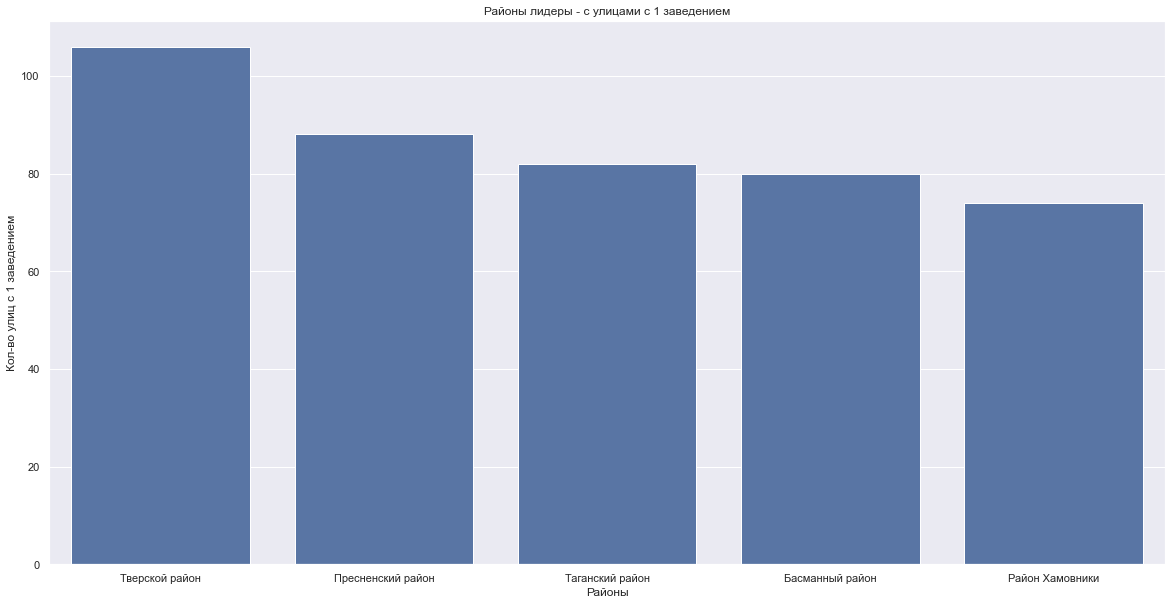

In [69]:
# построим график
plt.figure(figsize=(20, 10))
sns.barplot(data = object_1_count['area'].value_counts().reset_index().head(), x='index', y='area', color="b")
plt.title('Районы лидеры - с улицами с 1 заведением')
plt.xlabel('Районы')
plt.ylabel('Кол-во улиц с 1 заведением')
plt.show()

### Предварительный вывод:
* Всего улиц с 1 заведением - 551
* Лидер по числу улиц с 1 заведением - Тверской район (106)
* Далее примерно с равными данными (74-88 заведений) следуют Пресненский, Таганский, Басманный и Хамовнический район

## Чтобы дать рекомендации для открытия заведения общественного питания с роботами сделаем выборку по `top_streets`

In [70]:
# посчитаем медианное значений посадочных мест в  top_streets заведениях.
top_streets = (rest_data.groupby('street').agg({'id':'count', 'number':'median'})
               .sort_values(by='id', ascending=False)
               .reset_index()
               .head(10)
              )
top_streets.columns = ['street','points', 'median_place']
top_streets

,street,points,median_place
0,проспект Мира,204,46.5
1,Профсоюзная улица,182,24.5
2,Ленинградский проспект,172,40.0
3,Пресненская набережная,167,30.0
4,Варшавское шоссе,165,30.0
5,Ленинский проспект,148,45.0
6,проспект Вернадского,128,40.0
7,Кутузовский проспект,114,40.0
8,Каширское шоссе,111,25.0
9,Кировоградская улица,108,30.0


Видно потаьлице заведений на `top_streets` от 25 до 46 посадочных мест

In [71]:
# Найдём все заведения на улицах из top-10 в таблицу top_best_streets
best_streets = rest_data[rest_data['street'].isin(top10_streets['street'].tolist())]
best_streets

,id,object_name,chain,object_type,address,number,street
151,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,шаурма в пите,нет,быстрое питание,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
...,...,...,...,...,...,...,...
15308,213629,додо пицца,да,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная
15325,198436,милти,да,быстрое питание,"город Москва, Ленинградский проспект, дом 80, ...",0,Ленинградский проспект
15347,222491,кальянная «мята lounge»,да,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40,Профсоюзная улица
15350,213061,мята,да,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе


In [72]:
# посмотрим статестически важные значения
best_streets.groupby('street')['number'].describe()

,count,mean,std,min,25%,50%,75%,max
street,,,,,,,,
Варшавское шоссе,165.0,52.278788,74.345813,0.0,8.0,30.0,64.00,500.0
Каширское шоссе,111.0,55.504505,87.962376,0.0,7.0,25.0,77.50,680.0
Кировоградская улица,108.0,59.787037,79.480327,0.0,6.0,30.0,65.50,300.0
Кутузовский проспект,114.0,85.061404,194.464196,0.0,20.0,40.0,96.00,1700.0
Ленинградский проспект,172.0,52.337209,63.116640,0.0,15.0,40.0,70.00,625.0
Ленинский проспект,148.0,63.148649,67.850412,0.0,20.0,45.0,80.00,495.0
Пресненская набережная,167.0,45.844311,65.316834,0.0,8.5,30.0,50.00,478.0
Профсоюзная улица,182.0,47.620879,57.493734,0.0,5.0,24.5,68.75,240.0
проспект Вернадского,128.0,68.804688,123.295181,0.0,20.0,40.0,80.00,1288.0


Средние значения от 47 до 85 мест

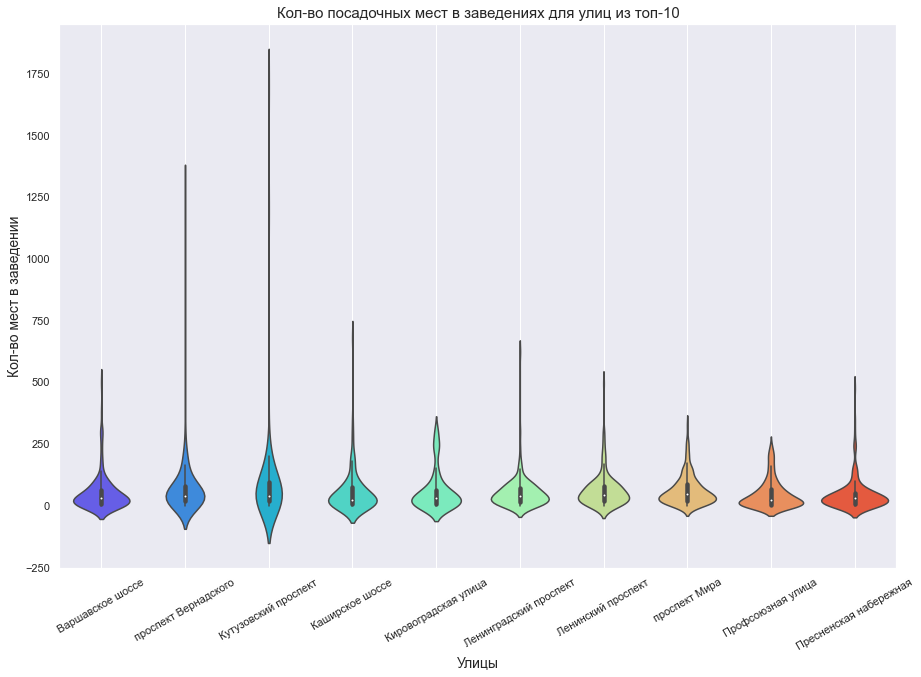

In [73]:
# построим "график-скрипку" для наглядности распределения
plt.figure(figsize=(15,10))
sns.violinplot(x='street', y='number', data=best_streets, palette='rainbow') 

plt.grid()
plt.title('Кол-во посадочных мест в заведениях для улиц из топ-10', size=15)
plt.xlabel('Улицы', size=14)
plt.ylabel('Кол-во мест в заведении', size=14)
plt.xticks(rotation=30)
plt.show()

## Вывод:


Вид заведения:
* Лидер по заведениям общ. питания с большим отрывом - кафе (6071)
* Второе место делят - столовая и ресторан(со средним значением 2400)
* Третье место у предприятий быстрого питание (1898)


Из всех заведений - сетевые это только 20%, остальных в 4 раза больше.

Заведения для которых характерно сетевое распространение:
* 1 место  `быстрое питание` (41,52%), которые очень распространены в Москве.  
* На 2 месте `магазин (отдел кулинарии)	` (28,57%)
* На 3 месте `рестораны` (23,79%)
        
Отношение кол-ва заведений к посадочным местам:        
* 1 место - много заведений/много мест  тройка из `кафе` `быстрое питание` и `ресторан` (ожидаемый результат много заведений и посадочных мест)
* 2 место - мало заведений/много мест `бар` и `столовая` (вечерние посиделки и обеды)
* 3 место - мало заведений/мало мест `кафетерий` `закусочная` `буфет` (там едят обычно стоя или забирают еду с собой)
* 4 место - много заведений/мало мест отсутствуют , скорее всего не рентабельна

1 место - лидеры тройка из кафе быстрое питание и ресторан 
2 место - бар и столовая 
3 место - кафетерий закусочная буфет это палатки (хот-доги, шаурма) 

Нужно много посадочных мест для:

* `столовая` в лидерах, в обед нужно обслужить большое кол-во людей
* `ресторан` на 2 месте, здесь тоже нет вопросов, встречи и разговоры за ужином собирают родственников или друзей

Улицы лидеры по заведениям:

* проспект Мира 204
* Профсоюзная улица 182
* Ленинградский проспект 172
* Пресненская набережная 167
* Варшавское шоссе 165
* Ленинский проспект 148
* проспект Вернадского 128
* Кутузовский проспект 114
* Каширское шоссе 111
* Кировоградская улица 108


Лидируют большие протяжённые проспекты и шоссе, из-за транспортной доступности и наличия торговых центров на них

Для примера:

    Ленинский пр-т - охватывает 4 округа и 8 районов , на нём располагается 148 заведения
    Проспект Мира - 2 округа и 7 районов, на нём располагается 204 заведения
    
Всего улиц с 1 заведением - 551.

Лидер по числу улиц с 1 заведением - Тверской район (106)
Далее примерно с равными данными (74-88 заведений) следуют Пресненский, Таганский, Басманный и Хамовнический район
Центральные районы с маленькими и короткими улицами - где можно из-за ограниченного пространства открыть маленькое кафе или поставить ларёк быстрого питания.

### На основе этих данных можем дать рекомендации открыть:

`КАФЕ` :
В городе более популярны кафе (из данных мы выяснили что их больше всего), потому этот тип заведения и рекомендуем со средним количеством посадочных мест на 30 - 60 персон. Располать его следует на центральных проспектах и улицах, так как на этих улицах наибольшее количество объектов. Но и проходимость объекта очень важна, нужно проанализировать платёжеспособность посетителей, в зависимости от района.

`РЕСТОРАН`
На втором месте можно рекомендовать открыть ресторан, но они окупаются дольше. Так как требуют существенные вложения, но и средний чек для ресторана превышает `кафе` и `столовую`

`СТОЛОВАЯ`
В центральной части без больших вложений рекомендуем открыть столовую, рядом с торговыми точками, бизнес центрами, метро, учебными заведениями с большим количеством людей, готовых быстро и без изысков перекусить.

Презентация: <https://www.icloud.com/iclouddrive/09a8vnZkfkz3TO2mhF1Ut6V1Q>